# Week 9 handin
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

Number of estimated clusters : 2
0.9094802961128475


Text(0.5, 1.0, 'Estimated number of clusters: 2')

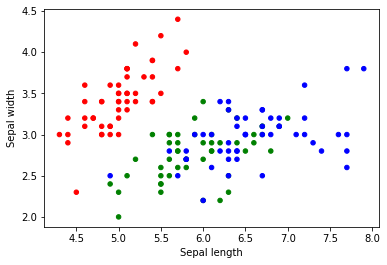

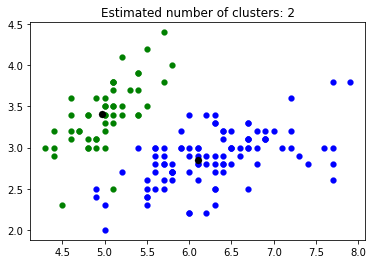

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth

label_enc = preprocessing.LabelEncoder()

df = pd.read_csv('data/iris_data.csv', decimal =',')
df.drop(['Petal length', 'Petal width'], axis='columns')

colormap = np.array(['r', 'g', 'b'])

df['Species'] = label_enc.fit_transform(df['Species'].astype(str))
df
df.plot.scatter('Sepal length', 'Sepal width', c=colormap[df['Species']])


def mean_shift(data, n_samples=10000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    print(bandwidth)
  
    return labels, cluster_centers, n_clusters

labels, cluster_centers, n_clusters = mean_shift(df.drop('Species', axis=1))

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
 
    cluster_center = cluster_centers[k]
    
    x = df[labels == k]['Sepal length']
    y = df[labels == k]['Sepal width']
    
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
